Accessing CEFI Cloud data with R
===
This example requires you to have used conda or mamba to install the [cefi-cookbook-dev environment as explained here](conda-setup).

The following notebook is a quick demostration on how to use R to access the CEFI Cloud data. This is designed for users that prefer the programing interface to be R. There are already couple of great resource related to preprocessing and visualizing data in R. Therefore, the notebook will not repeat that part of the code but focusing on how to accessing the data from a R interface. The resources is listed below 
> - http://cran.nexr.com/web/packages/rerddap/vignettes/Using_rerddap.html (A detail introduction of rerddap package and show the visualization in many different datasets)
> - https://ioos.github.io/ioos_code_lab/content/code_gallery/data_access_notebooks/2017-08-01-xtractoR.html (use a different package called xtractomatic to access the ERDDAP data)

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Launch R in Jupyterlab</p>
    In addition to the standard R code demonstrated below, our current interface leverages JupyterLab to execute R code using the R kernel. To enable this functionality, we utilize the environment.yml file to create a Conda/Mamba environment. The primary objective is to install the r-irkernel package within this environment.

This installation of r-irkernel through Conda/Mamba ensures that the R kernel becomes available as an option when launching JupyterLab. Selecting the R kernel empowers users to utilize the JupyterLab interface for running R code effortlessly.
    
</div>

## Packages used
In this example, we are going to use the _reticulate_ library with Python to read the CEFI data into an R data structure.

From there you can operate on the data in R (or R Studio) as you would any other data.

**N.B.** The only library you need to read the data is the retiuclate library to access the python environment to read the data.

The other libraries are used to filter the data and make a plot on a detailed base map.

The last line show the python configuration that should have been set up when you loaded the conda environment to run this notebook.

In [ ]:
library(reticulate)
library(dplyr)
library(maps)
library(ggplot2)
# reticulate::py_config()  # check python version

In [ ]:
use_condaenv('cefi-cookbook-dev')

## Get some python tools to read the data from the cloud storage
fsspec and xarray are python packages that are in the conda environment we build to run this notebook.
We're going to import them into our R environment and use them to create a pandas dataframe with lat,lon,tos as the columns

In [5]:
xr <- import('xarray')
fsspec <- import('fsspec')

## Get some data from the cloud
- Read the data
- select a time slice

In [6]:
fs <- fsspec$filesystem('reference', 
    remote_protocol='gcs',
    fo='gcs://noaa-oar-cefi-regional-mom6-nwa/northwest_atlantic/full_domain/hindcast/monthly/regrid/r20230520/tos.nwa.full.hcast.monthly.regrid.r20230520.199301-201912.json'
)
m <- fs$get_mapper()
dataset <- xr$open_dataset(m, engine='zarr', consolidated=FALSE)
subset <- dataset$sel(time='2012-12')

Get the variable long_name, date of the slice and data set title for the plot below

In [7]:
datetime <- subset$time$values
title <- subset$attrs$title
long_name <- subset$tos$attrs$long_name

## Reorganize that data into a data.frame 
We transform the gridded data into column data with lon, lat, tos as columns.
**Take care:** We are expanding along lon first and then by lat, so we reorder the xarray so that lon varies fastest to match.

In [8]:
subset <- subset$transpose('lon','lat','time')
df <- expand.grid(x = subset$lon$values, y=subset$lat$values)
data <- as.vector(t(matrix(subset$tos$values)))
df$Data <- data
names(df) <- c("lon", "lat", "tos")

## Subset the dataset
We use filter to extract the points over the Gulf region.

In [9]:
df_gulf = filter(df, lat>17)
df_gulf = filter(df_gulf, lat<31)
df_gulf = filter(df_gulf, lon>260)
df_gulf = filter(df_gulf, lon<290)
df_gulf

lon,lat,tos
<dbl[1d]>,<dbl[1d]>,<dbl>
261.5577,17.00457,NaN
261.6384,17.00457,NaN
261.7191,17.00457,NaN
261.7998,17.00457,NaN
261.8804,17.00457,NaN
261.9611,17.00457,NaN
262.0418,17.00457,NaN
262.1225,17.00457,NaN
262.2031,17.00457,NaN


## Longitude Manipulation 
The model lons are from 0 to 360, so we're going to use this function to normalize them to -180 to 180
The map polygons are defined on -180 to 180 we need to adjust our values to see them on the map

In [12]:
normalize_lon <- function(x) {
  quotient <- round(x / 360.)
  remainder <- x - (360. * quotient)
  # Adjust sign if necessary to match IEEE behavior
  if (sign(x) != sign(360.) && remainder != 0) {
    remainder <- remainder + sign(360.) * 360.
  }
  return(remainder)
}
df_gulf$lon <- unlist(lapply(df_gulf$lon, normalize_lon))

## Plot setup
Set up a resonable plot size and limits for the plot area of the world base map

In [13]:
options(repr.plot.width = 10, repr.plot.height = 10)
ylim <- c( min(df_gulf$lat), max(df_gulf$lat) )
xlim <- c( min(df_gulf$lon), max(df_gulf$lon) )

## Mesh/Dot Map 
Plot a mesh/dot colored according to the value of tos at each lat/lon location in the Gulf.

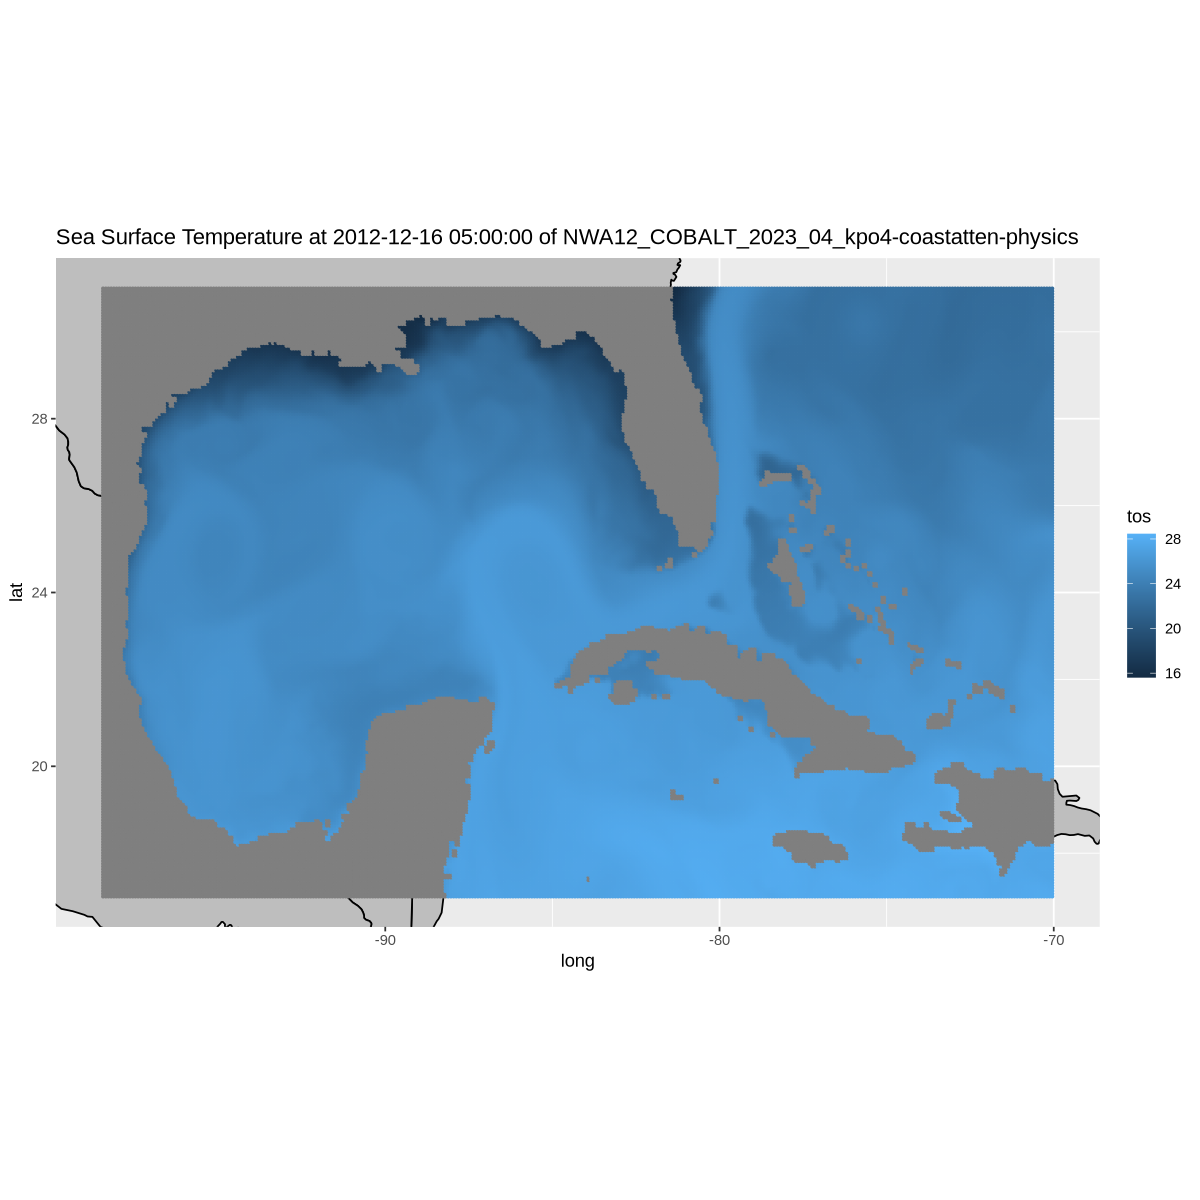

In [14]:
w <- map_data( 'world', ylim = ylim, xlim = xlim )
p = ggplot() + 
    geom_polygon(data = w, aes(x=long, y = lat, group = group), fill = "grey", color = "black") +
    coord_fixed(1.3, xlim = xlim, ylim = ylim) + 
    geom_point(data = df_gulf, aes(color = tos, y=lat, x=lon), size=.5) +
    labs(title = paste(long_name, 'at', datetime, 'of', title))
p

## Accessing the data on the original model grid
The original model grid is [explained in detail](rmom6Grid) at the beginning of the cookbook. Understanding where the data are located on the earth requires you to merge the raw grid data file with the grid description.
We'll get both the data and the grid from the cloud storage just as we did in the example above and merge them using xarray, then we'll convert them to a data.frame for plotting (or processing) in R.

**N.B.** we use the AWS cloud storage here. We used the Google Cloud Storage above. You can use either, but if you are computing in a cloud environment you'll get better performance if you use the same cloud.

**N.B.** The "bucket" names are slightly different

**N.B.** Additional parameters (remote_options and target_options) are needed to let AWS know that the access does not require any credentials and could be done anonymously.

In [15]:
params = list(anon = TRUE)
fs <- fsspec$filesystem('reference', 
    remote_protocol='s3',
    fo='s3://noaa-oar-cefi-regional-mom6-nwa-pds/northwest_atlantic/full_domain/hindcast/monthly/raw/r20230520/sos.nwa.full.hcast.monthly.raw.r20230520.199301-201912.json',
    remote_options=params,
    target_options=params
)
m <- fs$get_mapper()
dataset <- xr$open_dataset(m, engine='zarr', consolidated=FALSE)
fsg <- fsspec$filesystem('reference', 
    remote_protocol='s3',
    fo='s3://noaa-oar-cefi-regional-mom6-nwa-pds/northwest_atlantic/full_domain/hindcast/monthly/raw/r20230520/ocean_static.json',
    remote_options=params,
    target_options=params
)
gm <- fsg$get_mapper()
dataset <- xr$open_dataset(m, engine='zarr', consolidated=FALSE)
grid <- xr$open_dataset(gm, engine='zarr', consolidated=FALSE)

### Slicing the data
Here, we get one month slice from the data set. We took June 2003 in this case.

In [16]:
slice = dataset$sel(time='2003-06')
title = slice$attrs$title
long_name = slice$sos$long_name
datetime = slice$time$values
slice

<xarray.Dataset> Size: 3MB
Dimensions:     (time: 1, nv: 2, yh: 845, xh: 775)
Coordinates:
  * nv          (nv) float64 16B 1.0 2.0
  * time        (time) datetime64[ns] 8B 2003-06-16
  * xh          (xh) float64 6kB -98.0 -97.92 -97.84 ... -36.24 -36.16 -36.08
  * yh          (yh) float64 7kB 5.273 5.352 5.432 5.511 ... 51.9 51.91 51.93
Data variables:
    average_DT  (time) timedelta64[ns] 8B ...
    average_T1  (time) datetime64[ns] 8B ...
    average_T2  (time) datetime64[ns] 8B ...
    sos         (time, yh, xh) float32 3MB ...
    time_bnds   (time, nv) datetime64[ns] 16B ...
Attributes: (12/27)
    NCO:                    netCDF Operators version 5.0.1 (Homepage = http:/...
    NumFilesInSet:          1
    associated_files:       areacello: 19930101.ocean_static.nc
    cefi_archive_version:   /archive/acr/fre/NWA/2023_04/NWA12_COBALT_2023_04...
    cefi_aux:               N/A
    cefi_data_doi:          10.5281/zenodo.7893386
    ...                     ...
    cefi_subdomain: 

In [17]:
lon <- grid$geolon$values
lat <- grid$geolat$values

We're using the lat and lon values from the static grid file to pair with each data value we read from the raw grid file to create a data.frame with lon,lat,sos

In [18]:
slice <- slice$transpose('xh', 'yh', 'time', 'nv')
X <- as.vector(t(lon))
Y <- as.vector(t(lat))
data <- as.vector(t(matrix(slice$sos$values)))

df <- data.frame(
  "lon" = X,
  "lat" = Y,
  "sos" = data
)

In [20]:
sub = filter(df, lat>35)
sub = filter(sub, lat<45)
sub = filter(sub, lon>=-80)
sub = filter(sub, lon<=-60)
sub

lon,lat,sos
<dbl>,<dbl>,<dbl>
-80.00000,35.02885,NaN
-79.92001,35.02885,NaN
-79.84000,35.02885,NaN
-79.76001,35.02885,NaN
-79.67999,35.02885,NaN
-79.60001,35.02885,NaN
-79.51999,35.02885,NaN
-79.44000,35.02885,NaN
-79.35999,35.02885,NaN


In [21]:
options(repr.plot.width = 10, repr.plot.height = 10)
ylim <- c( min(sub$lat), max(sub$lat) )
xlim <- c( min(sub$lon), max(sub$lon) )

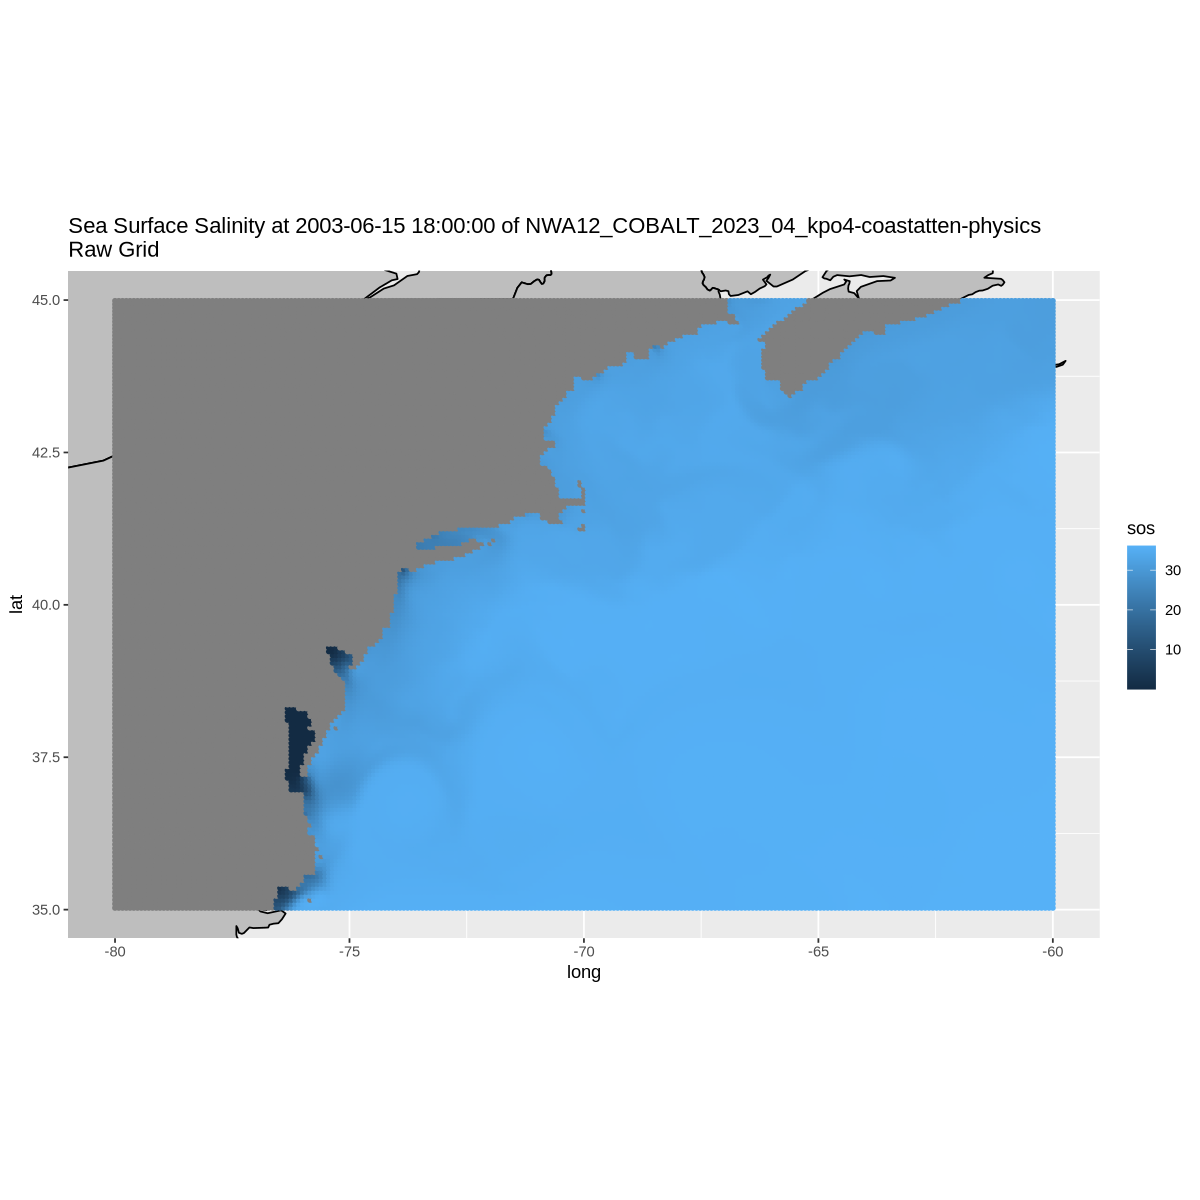

In [22]:
w <- map_data( 'world', ylim = ylim, xlim = xlim )
p = ggplot() + 
    geom_polygon(data = w, aes(x=long, y = lat, group = group), fill = "grey", color = "black") +
    coord_fixed(1.3, xlim = xlim, ylim = ylim) + 
    geom_point(data = sub, aes(color = sos, y=lat, x=lon), size=1) +
    labs(title = paste(long_name, 'at', datetime, 'of', title, '\nRaw Grid'))
p